# Pandas

## Contents

- [Overview](#Overview)
- [Read Data from CSV Files](#Read-Data-from-CSV-Files)
- [Access Online Data Sources](#Access-Online-Data-Sources)

## Overview

[Pandas](http://pandas.pydata.org/) is a package of fast, efficient data analysis tools for Python. The Pandas package

1. defines fundamental structures for working with data, and  
1. endows them with methods that facilitate operations such as  
  
  - reading in data  
  - adjusting indices  
  - working with dates and time series  
  - sorting, grouping, re-ordering and general [data wrangling](https://en.wikipedia.org/wiki/Data_wrangling)   
  - dealing with missing values, etc., etc.  

From here on we will assume that the following imports have taken place:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Read Data from CSV Files

`read_csv()` is an important pandas function to read CSV files and do operations on it.

In [2]:
df = pd.read_csv('example.csv')
type(df)

pandas.core.frame.DataFrame

In [3]:
df

,date,type,quantity
0,4/5/2019 13:34,Apples,73
1,4/5/2019 3:41,Cherries,85
2,4/6/2019 12:46,Pears,14
3,4/8/2019 8:59,Oranges,52
4,4/10/2019 2:07,Peaches,152
5,4/10/2019 18:10,Bananas,23
6,4/10/2019 2:40,Strawberries,98


A `DataFrame` is a panda data type that stores related columns of data. 
In essence, a `DataFrame` in pandas is analogous to a (highly optimized) Excel spreadsheet.

Thus, it is a powerful tool for representing and analyzing data that are naturally organized  into rows and columns, often with  descriptive indexes for individual rows and individual columns.

We can select particular rows using standard Python array slicing notation.

In [4]:
df[2:5]

,date,type,quantity
2,4/6/2019 12:46,Pears,14
3,4/8/2019 8:59,Oranges,52
4,4/10/2019 2:07,Peaches,152


To select columns, we can pass a list containing the names of the desired columns represented as strings.

In [5]:
df[['type', 'quantity']]

,type,quantity
0,Apples,73
1,Cherries,85
2,Pears,14
3,Oranges,52
4,Peaches,152
5,Bananas,23
6,Strawberries,98


To select both rows and columns using integers, we can use the `iloc` attribute with the format `.iloc[rows,columns]`.

In [6]:
df.iloc[2:5, 1:3]

,type,quantity
2,Pears,14
3,Oranges,52
4,Peaches,152


To select rows and columns using a mixture of integers and labels, the `loc` attribute can be used in a similar way.

In [7]:
df.loc[df.index[2:5], ['type', 'quantity']]

,type,quantity
2,Pears,14
3,Oranges,52
4,Peaches,152


Here the index `0, 1,..., 6` is redundant, because we can use fruit type as an index. 
To do this, we set the index to be the `type` variable in the dataframe:

In [8]:
df = df.set_index('type')
df

,date,quantity
type,,
Apples,4/5/2019 13:34,73
Cherries,4/5/2019 3:41,85
Pears,4/6/2019 12:46,14
Oranges,4/8/2019 8:59,52
Peaches,4/10/2019 2:07,152
Bananas,4/10/2019 18:10,23
Strawberries,4/10/2019 2:40,98


One of the nice things about pandas `DataFrame` object is that it has methods for plotting and visualization that work through Matplotlib.

For example, we can easily generate a bar plot of quantity:

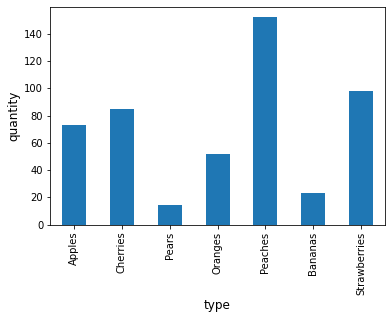

In [9]:
ax = df['quantity'].plot(kind='bar')
ax.set_xlabel('type',fontsize=12)
ax.set_ylabel('quantity',fontsize=12)
plt.show()

Suppose we would like to order the data frame by descending order of quantity:

In [10]:
df = df.sort_values(by='quantity', ascending=False)
df

,date,quantity
type,,
Peaches,4/10/2019 2:07,152
Strawberries,4/10/2019 2:40,98
Cherries,4/5/2019 3:41,85
Apples,4/5/2019 13:34,73
Oranges,4/8/2019 8:59,52
Bananas,4/10/2019 18:10,23
Pears,4/6/2019 12:46,14


Plotting as before now yields:

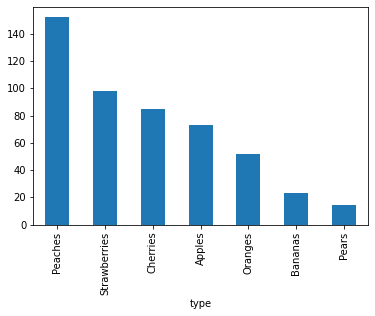

In [11]:
df['quantity'].plot(kind='bar')
plt.show()

## Access Online Data Sources 

We can access online CSV files from within a Python program. 
One option is to use [requests](http://docs.python-requests.org/en/master/), a standard Python library for requesting data over the Internet.

To begin, try the following code to retrieve the monthly unemployment rate data (from 1948 to current) from the U.S. Bureau of Labor Statistics at this web source:

In [12]:
import requests

url = 'http://research.stlouisfed.org/fred2/series/UNRATE/downloaddata/UNRATE.csv'
source = requests.get(url).content.decode().split("\n")
source[0]

'DATE,VALUE\r'

In [13]:
source[1]

'1948-01-01,3.4\r'

In [14]:
source[2]

'1948-02-01,3.8\r'

We now can use `read_csv()` function to parse the text. Notice `parse_dates=True` so that pandas recognizes the dates column, allowing for simple date filtering:

In [15]:
data = pd.read_csv(url, index_col=0, parse_dates=True)

The data has been read into a pandas DataFrame called `data` that we can now manipulate in the usual way

In [16]:
data.head()  # showing first 5 rows

,VALUE
DATE,
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4.0
1948-04-01,3.9
1948-05-01,3.5


DataFrame objects has a `describe` method that shows some additional (statistically oriented) features.

In [17]:
pd.set_option('precision', 1)
data.describe()  # Your output might differ slightly

,VALUE
count,885.0
mean,5.8
std,1.7
min,2.5
25%,4.5
50%,5.6
75%,6.8
max,14.8


We can also plot the unemployment rate from 2000 to 2021 as follows:

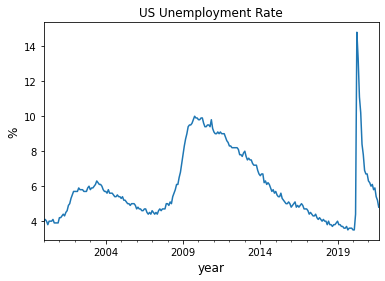

In [18]:
ax = data['2000':'2021'].plot(title='US Unemployment Rate', legend=False)
ax.set_xlabel('year', fontsize=12)
ax.set_ylabel('%', fontsize=12)
plt.show()